# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Requests
import requests
import json
import time
from pprint import pprint

# Data science
import pandas as pd
import numpy as np
import scipy.stats as sc

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if (response.status_code == 200):
            # Extract data
            city_weather = response.json()

            city_name = city_weather.get("name")
            city_country = city_weather.get("sys", {}).get("country")
            city_date = city_weather.get("dt")
            city_humidity = city_weather.get("main", {}).get("humidity")
            city_max_temp = city_weather.get("main", {}).get("temp_max")
            city_clouds = city_weather.get("clouds", {}).get("all")
            city_wind = city_weather.get("wind", {}).get("speed")
            city_lat = city_weather.get("coord", {}).get("lat")
            city_lng = city_weather.get("coord", {}).get("lon")


            # Append the City information into city_data list
            city_data.append({"City": city,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"The API threw a non-200 status code: {response['status_code']} for city {city}") # error log
            print()   

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | el granada
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | kruisfontein
Processing Record 4 of Set 1 | uturoa
Processing Record 5 of Set 1 | colonia
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | sandpoint
Processing Record 8 of Set 1 | arkalyk
Processing Record 9 of Set 1 | namtsy
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | vorgashor
Processing Record 13 of Set 1 | berezovyy
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | nar'yan-mar
Processing Record 16 of Set 1 | kerikeri
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | coahuayana de hidalgo
Processing Record 21 of Set 1 | lodja
Processing Record 22 of Set 1 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,el granada,37.5027,-122.4694,53.91,59,20,9.22,US,1732815177
1,puerto natales,-51.7236,-72.4875,59.45,47,40,20.71,CL,1732815178
2,kruisfontein,-34.0033,24.7314,58.50,75,15,6.85,ZA,1732815179
3,uturoa,-16.7333,-151.4333,80.67,74,100,11.05,PF,1732815134
4,colonia,50.9333,6.9500,45.25,82,75,8.05,DE,1732815181


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,el granada,37.5027,-122.4694,53.91,59,20,9.22,US,1732815177
1,puerto natales,-51.7236,-72.4875,59.45,47,40,20.71,CL,1732815178
2,kruisfontein,-34.0033,24.7314,58.50,75,15,6.85,ZA,1732815179
3,uturoa,-16.7333,-151.4333,80.67,74,100,11.05,PF,1732815134
4,colonia,50.9333,6.9500,45.25,82,75,8.05,DE,1732815181


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

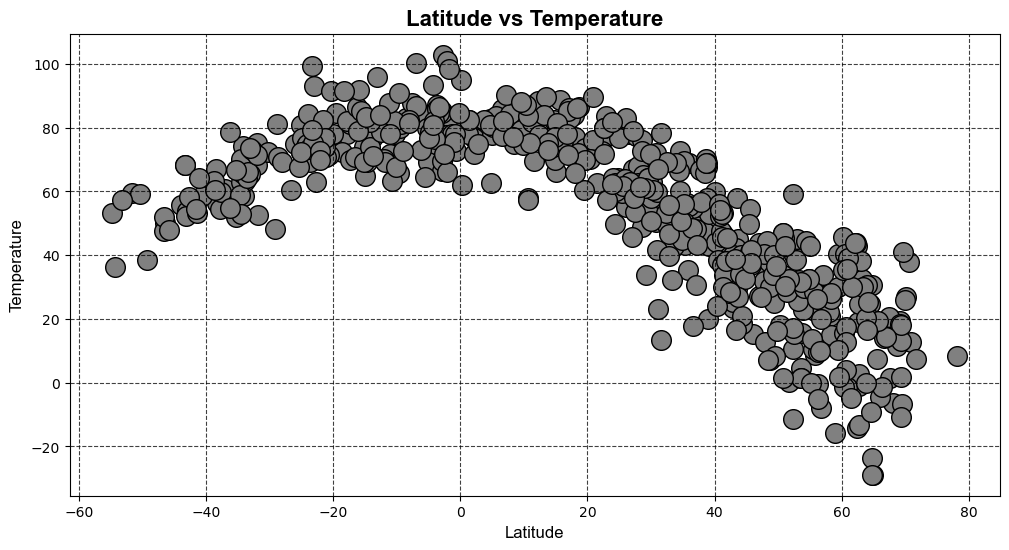

In [11]:
# make a scatter plot for Latitude vs Temperature

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], color="grey", edgecolor="black", s=200)

# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="black", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

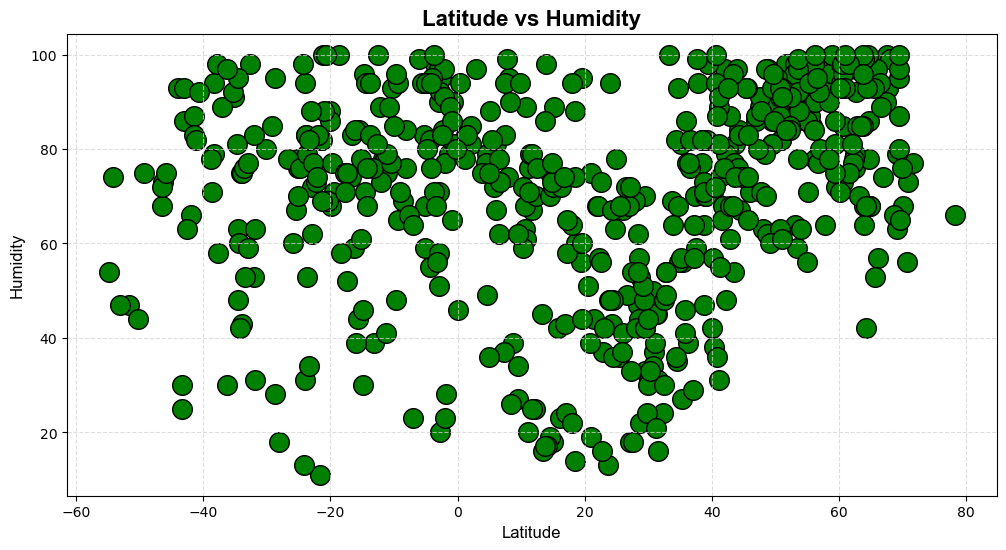

In [12]:
# Build the scatter plots for latitude vs. humidity

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df.Humidity, color="green", edgecolor="black", s=200)

# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Humidity", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

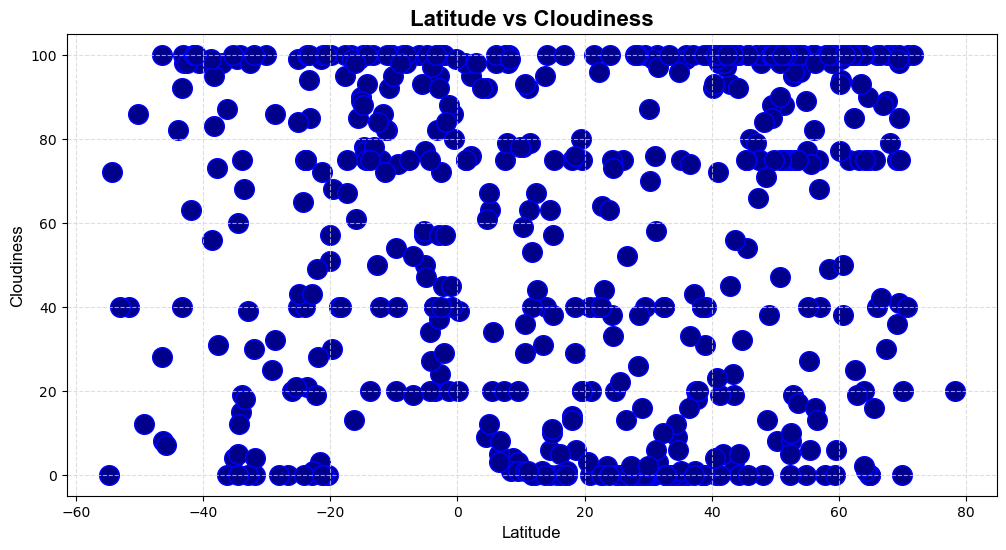

In [13]:
# Build the scatter plots for latitude vs. cloudiness

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df.Cloudiness, color="darkblue", edgecolor="blue", s=200)

# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Cloudiness", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

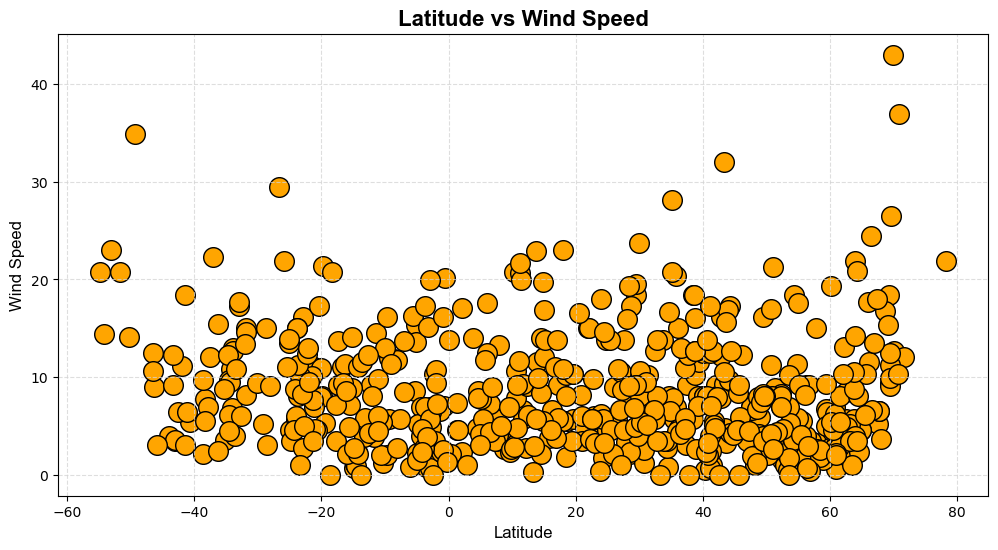

In [14]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"], color="orange", edgecolor="black", s=200)

# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Wind Speed", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots

def regression_plot(x_values, y_values, x_label, y_label, title, annotation):
    # do regression
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # these are the points/predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rvalue)
    print(line_eq)

    # Change Canvas Size
    plt.figure(figsize=(12, 6))

    # Create a basic plot
    plt.scatter(x_values, y_values, color="purple", edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6) # the regression line

    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(title, fontweight="bold", fontsize=16, fontfamily="Arial")

    # Add in a background grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")

    # Show/Save the Graph
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,el granada,37.5027,-122.4694,53.91,59,20,9.22,US,1732815177
1,colonia,50.9333,6.9500,45.25,82,75,8.05,DE,1732815181
2,olonkinbyen,70.9221,-8.7187,12.76,73,100,36.93,SJ,1732815115
3,sandpoint,48.2766,-116.5533,33.71,91,100,1.01,US,1732814997
4,arkalyk,50.2486,66.9114,18.16,91,8,3.58,KZ,1732815184


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,59.45,47,40,20.71,CL,1732815178
1,kruisfontein,-34.0033,24.7314,58.50,75,15,6.85,ZA,1732815179
2,uturoa,-16.7333,-151.4333,80.67,74,100,11.05,PF,1732815134
3,invercargill,-46.4000,168.3500,50.02,73,8,8.99,NZ,1732815110
4,grytviken,-54.2811,-36.5092,36.27,74,72,14.36,GS,1732815109


###  Temperature vs. Latitude Linear Regression Plot

-0.8630641535005192
y = -1.22x + 92.99


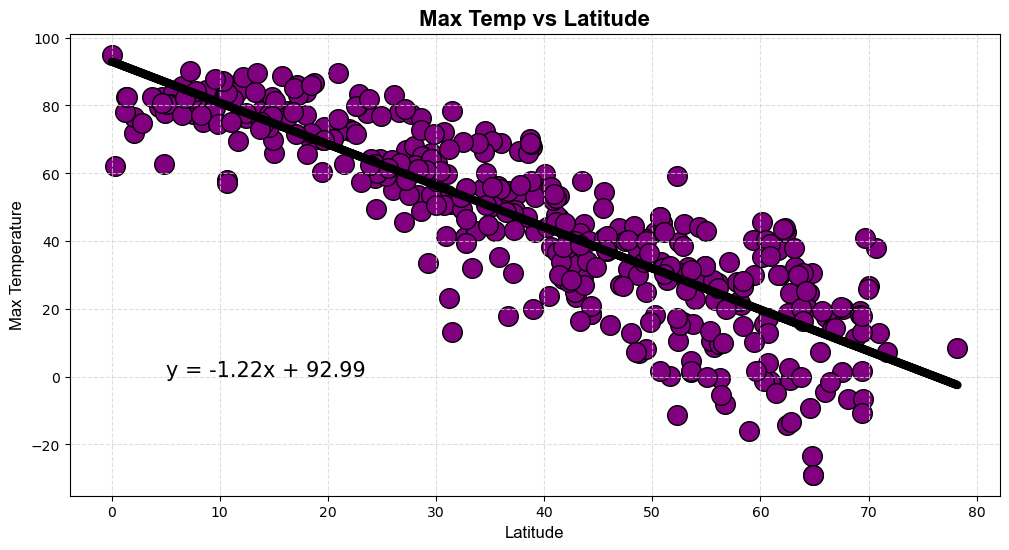

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
title = "Max Temp vs Latitude"
annotation = (5, 0)
regression_plot(x_values, y_values, x_label, y_label, title, annotation)

0.7036139397125525
y = 0.59x + 84.98


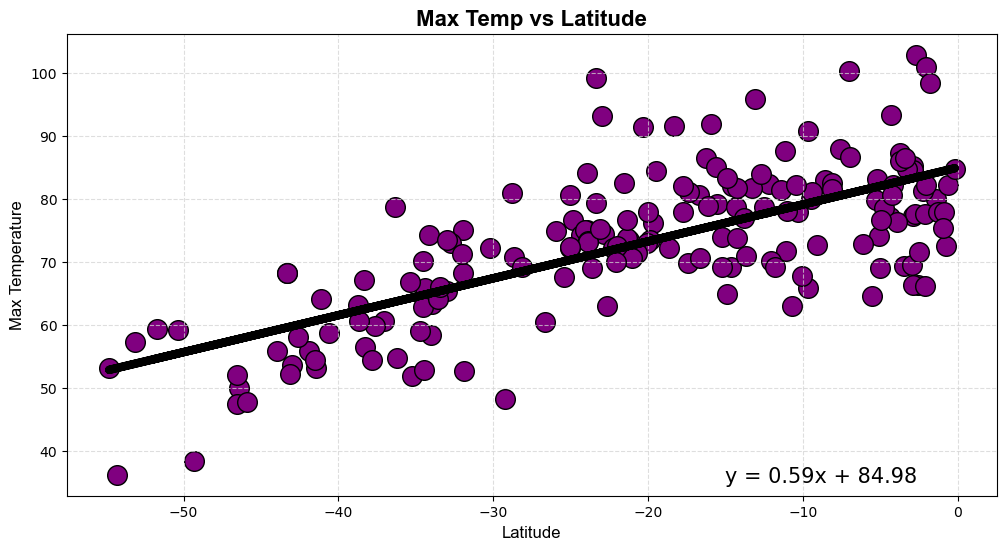

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
title = "Max Temp vs Latitude"
annotation = (-15, 35)
regression_plot(x_values, y_values, x_label, y_label, title, annotation)

#### *Discussion about the linear relationship:* These are strong linear relationships, In the Northern Hemisphere the further you go away from the Equator, the colder it gets. On the other hand, In the Southern Hemisphere the further you go to the Equator, the hotter it gets.

### Humidity vs. Latitude Linear Regression Plot

0.437249081736266
y = 0.51x + 50.37


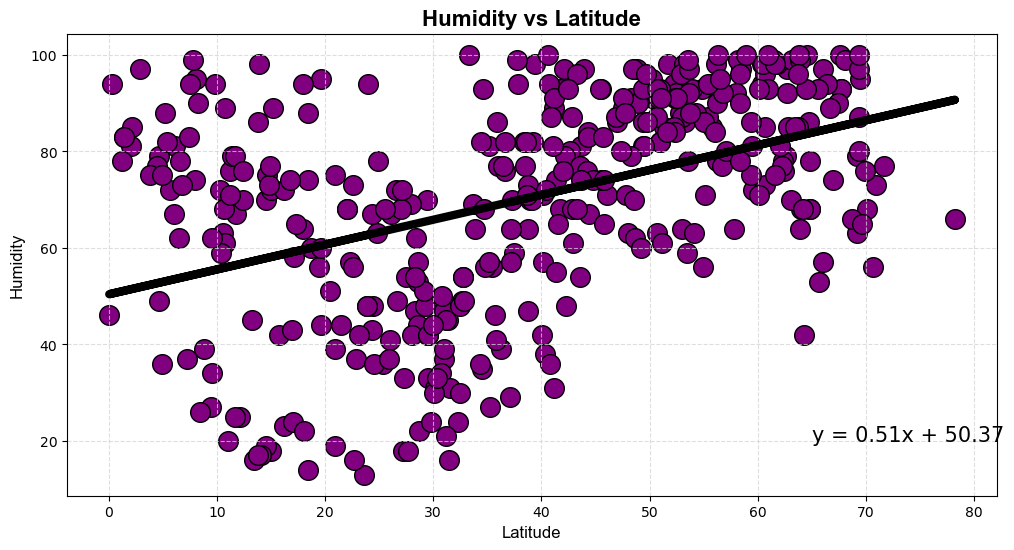

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Humidity
x_label = "Latitude"
y_label = "Humidity"
title = "Humidity vs Latitude"
annotation = (65, 20)
regression_plot(x_values, y_values, x_label, y_label, title, annotation)

0.13598069777416036
y = 0.2x + 76.32


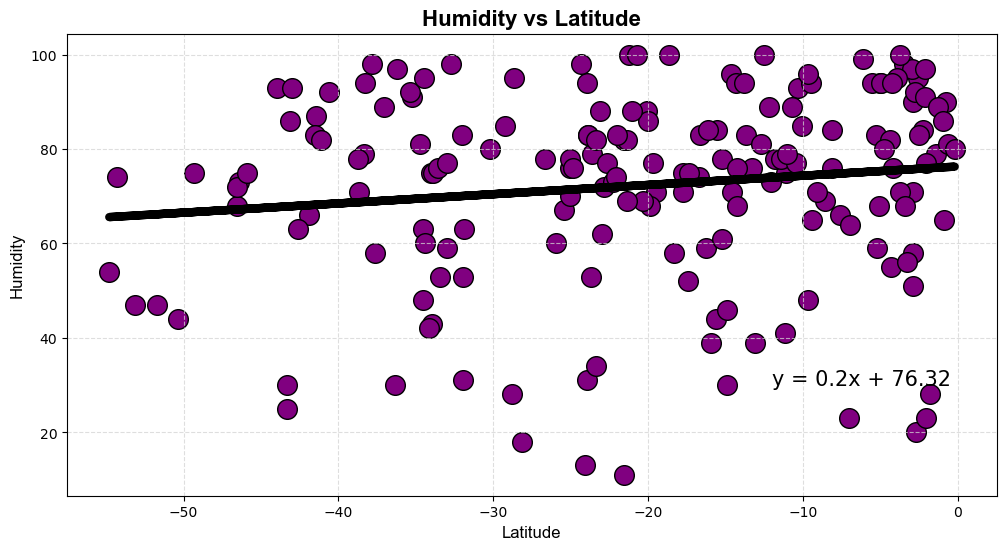

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Humidity
x_label = "Latitude"
y_label = "Humidity"
title = "Humidity vs Latitude"
annotation = (-12, 30)
regression_plot(x_values, y_values, x_label, y_label, title, annotation)

**Discussion about the linear relationship:** There is no correlation between the two graphs.

### Cloudiness vs. Latitude Linear Regression Plot

0.3013339567569505
y = 0.64x + 29.82


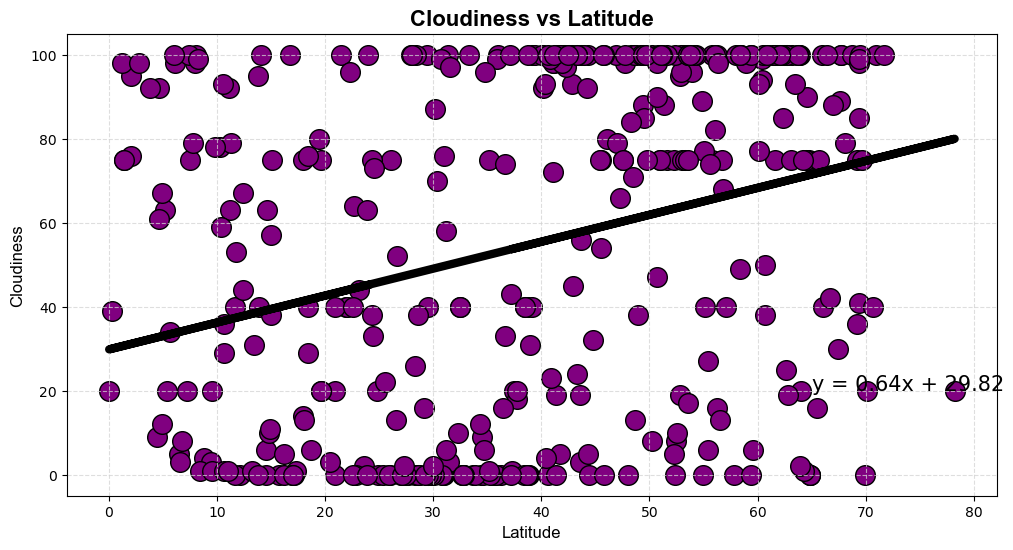

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Cloudiness
x_label = "Latitude"
y_label = "Cloudiness"
title = "Cloudiness vs Latitude"
annotation = (65, 20)
regression_plot(x_values, y_values, x_label, y_label, title, annotation)

0.1525438678357934
y = 0.37x + 69.99


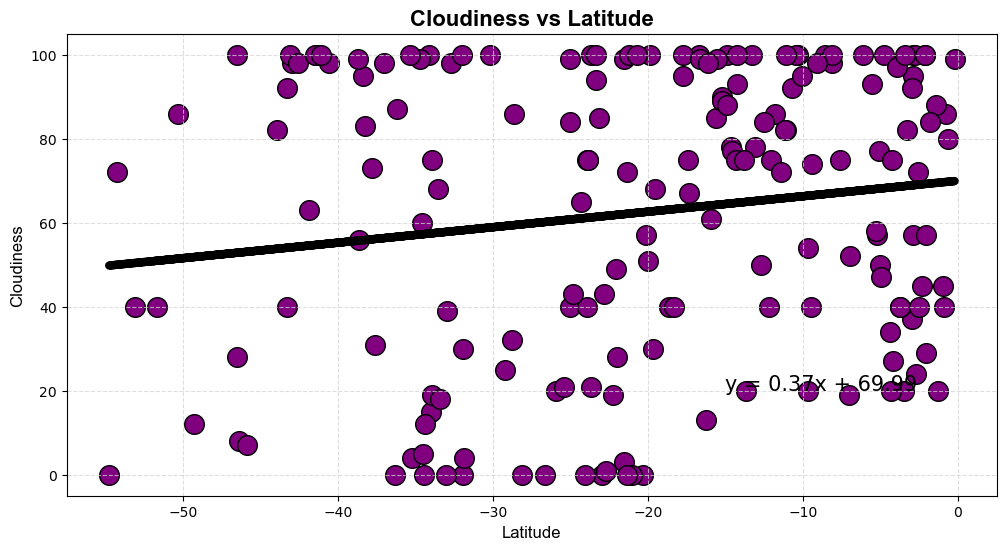

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Cloudiness
x_label = "Latitude"
y_label = "Cloudiness"
title = "Cloudiness vs Latitude"
annotation = (-15, 20)
regression_plot(x_values, y_values, x_label, y_label, title, annotation)

**Discussion about the linear relationship:** There is no correlation between the two graphs

### Wind Speed vs. Latitude Linear Regression Plot

0.008920388817915419
y = 0.0x + 7.88


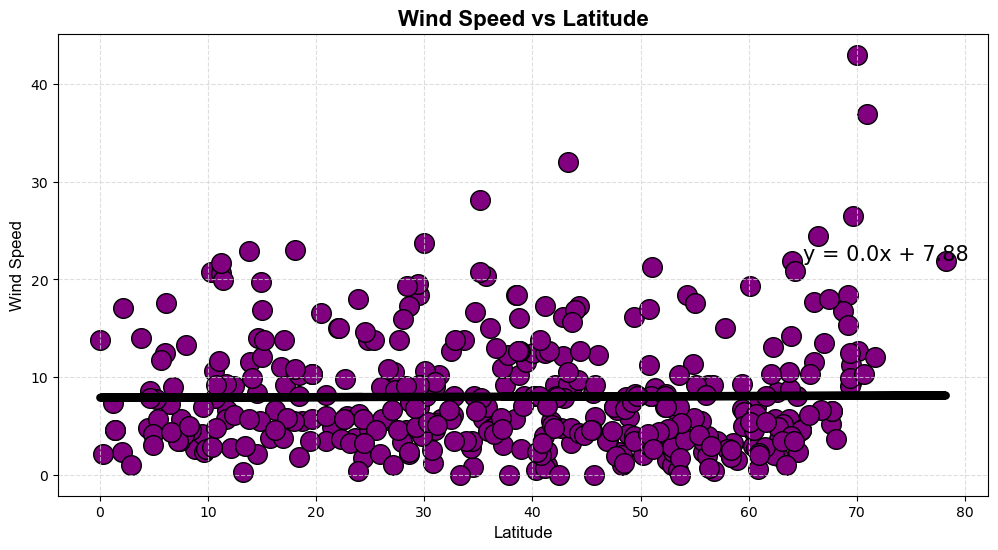

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title = "Wind Speed vs Latitude"
annotation = (65, 22)
regression_plot(x_values, y_values, x_label, y_label, title, annotation)

-0.2865208230428721
y = -0.12x + 6.31


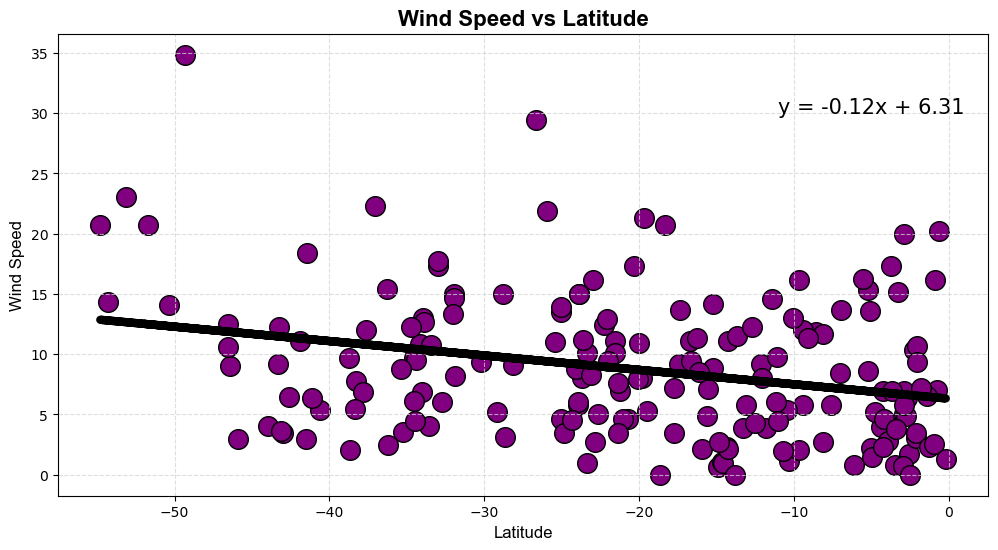

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title = "Wind Speed vs Latitude"
annotation = (-11, 30)
regression_plot(x_values, y_values, x_label, y_label, title, annotation)

**Discussion about the linear relationship:** These two are pretty interesting, as in the northern hemisphere you can see it's 
pretty steady wether you are close to the equator or not the wind speed stays between 0-20. While for the most part in the Southern Hemisphere you can see the wind speed declining as you are getting closer to the equator.